In [1]:
import numpy as np
import pandas as pd
import json
import csv
import os
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, LSTM, Bidirectional, Dense, Dropout, BatchNormalization, Embedding, concatenate, Flatten
from keras.models import Model, Sequential, load_model

Using TensorFlow backend.


---

# Function to load data from csv file to a python dictionary (hash map)

---


In [4]:
def load_data(data_file):
  dict_df = {'label':[],
             'id':[],
             'data':[],
             #'comments':[],
             'message_order':[]}
  with open(data_file,'r') as csv_file:
      data = csv.reader(csv_file,delimiter=',')
      for row in data:
          if(row[0] == 'data'):
              continue
          else:
              try:
                  json_read = json.loads(row[0].replace("'","\""))
                  dict_df['id'].append(json_read['id'])
                  dict_df['data'].append(json_read['data'])
                  #dict_df['comments'].append(json_read['comments'])
                  dict_df['message_order'].append(json_read['message_order'])
                  dict_df['label'].append(row[1])
              except:
                  pass
  return dict_df

In [6]:
data_file = 'round2_task_data.csv'
df = pd.DataFrame.from_dict(load_data(data_file))

---
# Exploratory data analysis (getting insights from data by plotting graphs and charts)
---

## Plotting a graph to count all labels for each message order

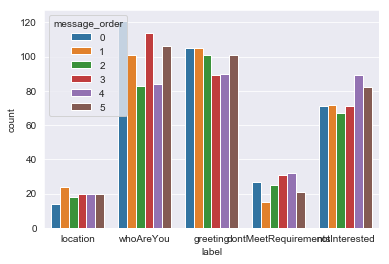

In [7]:
sns.set_style(style='darkgrid')
sns.countplot(x='label',data = df,hue='message_order')

## Plotting a graph to count all labels

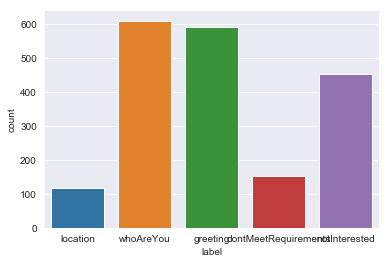

In [8]:
sns.countplot(x='label',data=df)

## Exploring the data using dataframe functions

In [9]:
df.loc[df['label'] == 'whoAreYou']

,data,id,label,message_order
1,Location,L9DC9H,whoAreYou,5
2,hi,ZQR6R5,whoAreYou,5
5,sir,M2IRWL,whoAreYou,3
6,K,5MXRNL,whoAreYou,2
9,Sir I dnt have two wheeler,GI07N1,whoAreYou,2
16,Where it is,NKB41P,whoAreYou,1
18,were,OGBMAM,whoAreYou,5
20,No,OAMYVS,whoAreYou,0
25,Marathi,Z7UF71,whoAreYou,3
26,Ok,GZLTJC,whoAreYou,1


In [10]:
df.describe()

,message_order
count,1919.000000
mean,2.496092
std,1.731708
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,5.000000


In [11]:
df.label.value_counts()

whoAreYou               609
greeting                591
notInterested           452
dontMeetRequirements    151
location                116
Name: label, dtype: int64

## Plotting a heatmap to denote correlation among label, data and message_order

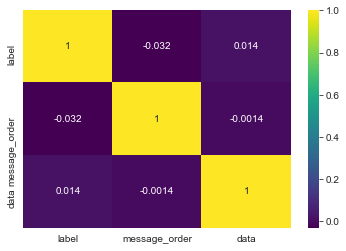

In [12]:
sns.heatmap(df[['label','message_order','data']].apply(lambda x:pd.factorize(x)[0]).corr(),annot=True,cmap='viridis')

**From the above heatmap, it is evident that none of the features and label have correlation, so all of them can be selected as features into the machine learning pipeline**

### Converting a categorical data like label into numerical form.
For eg, whoAreYou ---> 0 , greeting ---> 1 etc. 

In [13]:
df[['label','data']].apply(lambda x:pd.factorize(x)[0])

,label,data
0,0,0
1,1,1
2,1,2
3,2,3
4,2,4
5,1,5
6,1,6
7,3,7
8,3,8
9,1,9


### Plotting a boxplot to visualise mean, median and modes in the message_order column

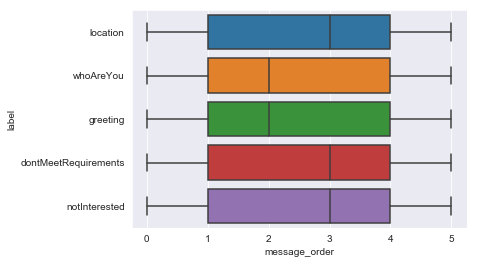

In [14]:
sns.boxplot(x='message_order',y='label',data=df)

In [15]:
print(pd.factorize(df['label'])[1])

Index([u'location', u'whoAreYou', u'greeting', u'dontMeetRequirements',
       u'notInterested'],
      dtype='object')


### Plotting a distribution for label column

/Users/pushkar/anaconda2/envs/myenv/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


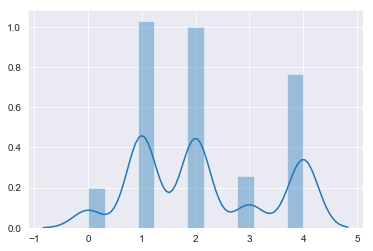

In [16]:
sns.distplot(pd.factorize(df['label'])[0])

### Plotting a distribution for message_order column

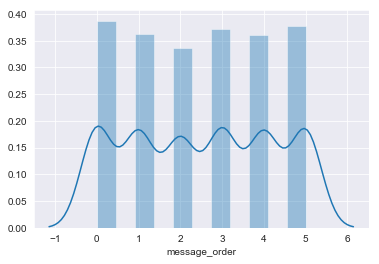

In [17]:
sns.distplot(df['message_order'])

### Plotting counts of all labels

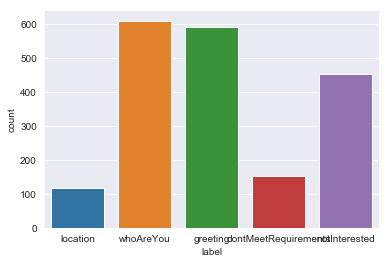

In [18]:
sns.countplot(df['label'])

# Data PreProcessing 

### Function 'cleaning' to replace 


1.   .(dot) to ' ' (space)
2.   greater than one spaces to no space
3.   trimming the sentences at both ends
4.   Removing all characters except alphabets



In [19]:
import re
replace_dots = re.compile('[.]')
replace_spaces = re.compile('[ ]+')
replace_space_start_end = re.compile('^ | $')
replace_special_chars = re.compile('[^a-zA-Z ]',re.IGNORECASE)

def cleaning(chats):
    cleaned = []
    for i in range(len(chats)):
        chat = chats[i]
        chat = replace_dots.sub(' ',chat)
        chat = replace_spaces.sub(' ',chat)
        chat = replace_special_chars.sub('',chat)
        chat = replace_space_start_end.sub('',chat)
        cleaned.append(chat)
    return cleaned

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/pushkar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
cleaned = cleaning(df['data'])

### Function 'tokenizeandConvertToLower' to divide the sentence into tokens and transform into lowercase

In [22]:
def tokenizeandConvertTolower(chats):
    converted = []
    for chat in chats:
        tokens = word_tokenize(chat)
        #print(tokens)
        lowers = [x.lower() for x in tokens]
        converted.append(lowers)
    return converted

### Function 'tokenizeToNumerical' to take the tokenized words and assign each word a number and then replacing the word as the number

In [23]:
def tokenizeToNumerical(chats):
    tokenizer = Tokenizer(split = ' ',lower = True)
    tokenizer.fit_on_texts(chats)
    return (tokenizer.texts_to_sequences(chats),tokenizer)

In [24]:
(tokens, tokenizer) = tokenizeToNumerical(cleaned)

### Function 'max_length' to find the length of largest sequences 

In [25]:
def max_length(tokens):
    return len(max(tokens,key=len))

In [26]:
max_len = max_length(tokens)

In [27]:
vocab_size = len(tokenizer.index_word) + 1
vocab_size

751

### Function 'padSeq' to pad sentences to same size (max length)

In [28]:
def padSeq(chats,max_len):
    return pad_sequences(chats,maxlen = max_len, padding = 'post')

In [29]:
padded = padSeq(tokens,max_len)

In [30]:
df['data'].dtype

dtype('O')

### Tokenize output labels

In [31]:
(output_tokens,_) = tokenizeToNumerical(df['label'])

In [32]:
np.shape(output_tokens)

(1919, 1)

### Function 'oneHot' to convert categorical data (data in {0,1,2,...}) to one hot encoding.
For Eg. [[1],[2]] ---> [[1,0],[0,1]]

Here 1 has been assigned 1st dimension and 2 has been assigned 2nd dimension

In [33]:
def oneHot(output):
    encoder = OneHotEncoder(sparse = False)
    return encoder.fit_transform(output)

In [34]:
output_one_hot = oneHot(output_tokens)
input_mes_ord_one_hot = oneHot(np.expand_dims(df['message_order'],axis = -1))

/Users/pushkar/anaconda2/envs/myenv/lib/python2.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [35]:
input_mes_ord_one_hot.shape

(1919, 6)

### Splitting the dataset into training and validation to check the accuracy of the model on validation dataset to prevent overfitting

In [36]:
train_x, val_x, train_y, val_y, train_ord, val_ord = train_test_split(padded,output_one_hot,df['message_order'], shuffle = True,test_size=0.1)

In [37]:
ord_shape = max(val_ord) + 1

In [38]:
ord_shape

6

# Creating models and training

### Funtion 'train_model_with_message_order' to create a keras lstm model with message order as auxilliary input

In [42]:
def train_model_with_message_order(): 
  if not os.path.isfile("model_with_message_order.h5"):
    input_layer = Input(shape = (max_len,))
    x = Embedding(vocab_size,256,input_length = max_len)(input_layer)
    print(x.shape)
    x = Bidirectional(LSTM(256))(x)

    aux_in = Input(shape = (1,))
    print(aux_in.shape)
    x_aux = Flatten()(Embedding(ord_shape,10)(aux_in))
    print(x_aux.shape)
    x_aux = concatenate([x, x_aux])

    x = Dense(1024, activation = 'relu')(x_aux)
    x = BatchNormalization()(x)
    x = Dense(512, activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = Dense(256, activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = Dense(64, activation = 'relu')(x)
    x = BatchNormalization()(x)
    output_layer = Dense(5, activation = 'softmax')(x)

    model = Model(inputs=[input_layer,aux_in],outputs = [output_layer])
    print(model.summary())
    model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
    model.fit([train_x,train_ord],train_y,batch_size = 256, epochs = 500, validation_data = ([val_x,val_ord],val_y))
    model.save('model_with_message_order.h5')
  else:
    model = load_model('model_with_message_order.h5')
    print(model.test_on_batch([val_x,val_ord],val_y))

### Function 'train_model_without_message_order' to create a keras lstm model without message_order as input 

In [47]:
def train_model_without_message_order():
  if not os.path.isfile("model_without_message_order.hdf5"):
    input_layer = Input(shape = (max_len,))
    x = Embedding(vocab_size,256,input_length = max_len)(input_layer)
    print(x.shape)
    x = Bidirectional(LSTM(256))(x)

    x = Dense(1024, activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = Dense(512, activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = Dense(256, activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = Dense(64, activation = 'relu')(x)
    x = BatchNormalization()(x)
    output_layer = Dense(5, activation = 'softmax')(x)

    model = Model(inputs=[input_layer],outputs = [output_layer])
    print(model.summary())
    model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
    model.fit([train_x],train_y,batch_size = 256, epochs = 500, validation_data = ([val_x],val_y))
    model.save("model_without_message_order.hdf5")
  else:
    model = load_model("model_without_message_order.hdf5")
    print(model.test_on_batch(val_x,val_y))

In [ ]:
train_model_without_message_order()

In [ ]:
train_model_with_message_order()

# Analysis of the results

---
The model with message_order as input achieves a validation accuracy of ~0.26 and training accuracy of ~0.66.

The model without message_order as input achieves a validation accuracy of ~0.28 and training accuracy of ~0.60

Looking at the 2 models , it can be inferred that model with message_order has learned the training data better than the model without message order but is unable to generalise better. Which means that message_orer is an important feature as it brings in more structure to the data.

But looking at the 2 accuracies, it can be concluded that the dataset is not adequate to be learned from.
Meaning that the chats in dataset can't be classified into intents. 

There are multiple reasons for this, 


1.   The chat data has roman script of multiple languages like hindi, kannada, marathi
2.   The english words are also not appropriate , i.e., most of the words don't have vowels in them which makes it difficult for the learning algorithm to group these words, like hi and hii are 2 different words in the dataset, but they mean the same.

**Solution** :  a larger corpus of data is needed to learn correct word vectors for these kind of words and then using these word vectors, we can learn to classify the intent.

